In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

In [10]:
#Get train data set up
# Path to the zip file
train_zip_file_path = r'C:\Users\Ryan\OneDrive\Documents\Computer Vision\CV Discussion2\train.csv.zip'

# Name of the CSV file inside the zip
train_csv_file_name = 'train.csv'

# Open the zip file and read the CSV file
with zipfile.ZipFile(train_zip_file_path, 'r') as zip_ref:
    with zip_ref.open(train_csv_file_name) as csv_file:
        train_df = pd.read_csv(csv_file)

# Display the first few rows
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Get test data set up
# Path to the test data zip file
test_zip_file_path = r'C:\Users\Ryan\OneDrive\Documents\Computer Vision\CV Discussion2\test.csv.zip'

# Name of the CSV file inside the zip
test_csv_file_name = 'test.csv'  # Update this based on the actual file name

# Open the zip file and read the CSV file
with zipfile.ZipFile(test_zip_file_path, 'r') as zip_ref:
    with zip_ref.open(test_csv_file_name) as csv_file:
        test_df = pd.read_csv(csv_file)

# Display the first few rows of the test data
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Seperate the label from the features (classification from the predictors)
train_x = train_data.iloc[:,1:] #Seperating the pixel values (our features) from the label (what the classification is)
train_y = train_data.iloc[:,0] #Seperating the label from the data (the classification) 

#Note we don't do this for the testing data because there is no classification in the test data given.

In [12]:
# Normalize the data
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

#Normalize the test data
test_x = scaler.transform(test_df)

In [13]:
# Split the data into training and validation sets, random state 77 bc thats my favorite number
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=77)


In [55]:
# Build a simple ANN model
#The Sequential model is a linear stack of layers where you can easily add one layer after another. - chatGPT 
#This is ideal for building a simple feedforward neural network where data flows from input to output through a series of layers.
#Call the instance for a Sequential model ... we have to play around with the architecture to see what works best 
#second try I am adding dropouts - randomly drops a percentage of neurons in a layer at forward pass to help not have the model rely on a few neurons too much
#I also added a layer

model = Sequential() 
model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
model.add(Dense(128, activation='relu'))# Hidden layer with 128 neurons
model.add(Dropout(.3))
model.add(Dense(64, activation='relu'))  # Another hidden layer with 64 neurons
model.add(Dropout(.3))
model.add(Dense(32, activation='relu'))  # Another hidden layer with 64 neurons
model.add(Dropout(.3))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons for each digit class

In [56]:
# Compile the model
#Arguements: Optimizer works to minimize the loss. Adam achieves this through gradient descent methods
#optimizer = adam (Adaptive Moment Estimation) - combines benefits of both AdaGrad and RMSProp (two other popular optimizers).
#Adam can adapt the learning rate for each weight in the NN

#Loss = specifies the loss function. 'sparse_categorical_crossentropy' is used when the target variable is both an integer and not one-hot encoded
#I did not one-hot encode because I thought it was an extra unnessessary step. I also read that when possible using sparse_categorical_crossentropy is
#more computationally/memory friendly 

#Metrics - specifies the metric used to assess the performance of the model. Here we are aiming for accuracy.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
# Train the model with validation set. Using 32 batch size and 20 epochs
ANNmodel = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6401 - loss: 1.1409 - val_accuracy: 0.9264 - val_loss: 0.2765
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8840 - loss: 0.4225 - val_accuracy: 0.9389 - val_loss: 0.2199
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9074 - loss: 0.3389 - val_accuracy: 0.9437 - val_loss: 0.1998
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9230 - loss: 0.2787 - val_accuracy: 0.9513 - val_loss: 0.1813
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9284 - loss: 0.2639 - val_accuracy: 0.9530 - val_loss: 0.1697
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9405 - loss: 0.2272 - val_accuracy: 0.9549 - val_loss: 0.1579
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9434 - loss: 0.2072 - val_accuracy: 0.9557 - val_loss: 0.1765
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9462 - loss: 0.2000 - 

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


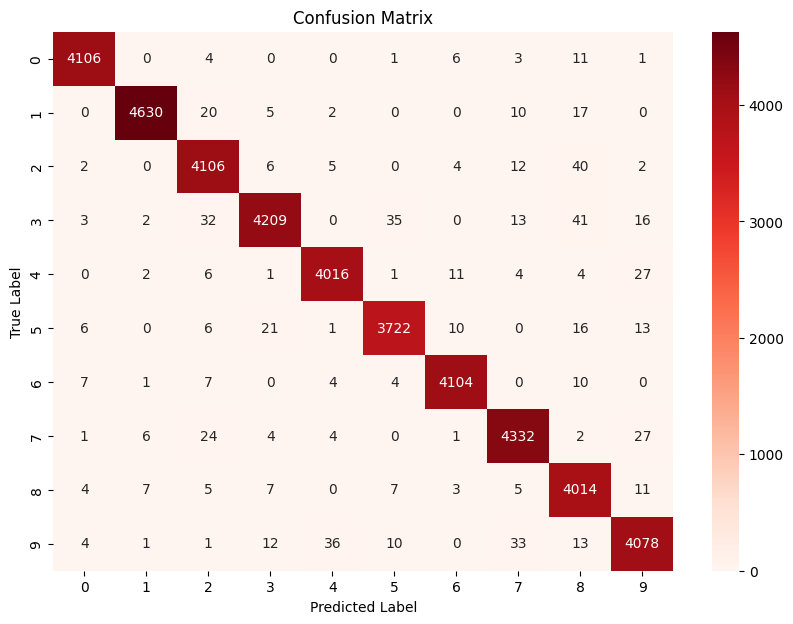

In [58]:
# Make predictions on the whole training set
y_pred_probs = model.predict(train_x)
y_pred = np.argmax(y_pred_probs, axis=1)  #Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(train_y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=[str(i) for i in range(10)], 
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [59]:
# Predict the test data
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [61]:
#Extract the csv file with test predictions as a csv file for Kaggle Submission.
#save to csv for submission to kaggle
kaggle_submission = pd.DataFrame({
    'ImageId': test_df.index + 1, 
    'Label': predicted_classes
})

#where I want the file on my computer.
submission_file_path = r'C:\Users\Ryan\OneDrive\Documents\Computer Vision\CV Discussion2\kagglesubmission2.csv'

# Save the DataFrame to a CSV file
kaggle_submission.to_csv(submission_file_path, index=False)